In [9]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score
from sklearn import datasets

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

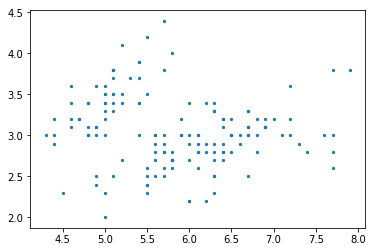

In [11]:
# X = varied[0]
X = datasets.load_iris().data
ClusterUtils.visualize_sample_data(X)

In [12]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['AgglomerativeClustering'], 
                                       dim_reduction_alg_ls=[],
                                       n_evaluations=30, seed=27, run_obj='quality', cutoff_time=10, shared_model=True,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * calinski_harabasz_score(X, y_pred)  
                                      )

Configuration space object:
  Hyperparameters:
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    clustering_choice, Type: Categorical, Choices: {AgglomerativeClustering}, Default: AgglomerativeClustering
    linkage___AgglomerativeClustering, Type: Categorical, Choices: {ward, complete, average, single}, Default: complete
    n_clusters___AgglomerativeClustering, Type: UniformInteger, Range: [1, 20], Default: 10
  Conditions:
    affinity___AgglomerativeClustering | clustering_choice in {'AgglomerativeClustering'}
    linkage___AgglomerativeClustering | clustering_choice in {'AgglomerativeClustering'}
    n_clusters___AgglomerativeClustering | clustering_choice in {'AgglomerativeClustering'}
  Forbidden Clauses:
    (Forbidden: linkage___AgglomerativeClustering == 'ward' && Forbidden: affinity___AgglomerativeClustering in {'cityblock', 'cosine', 'l1', 'l2', 'manhattan'})

Fitting configuration: 

Fitting configuration: {'affinity___AgglomerativeClustering': 'euclidean', 'n_clusters___AgglomerativeClustering': 20, 'clustering_choice': 'AgglomerativeClustering', 'linkage___AgglomerativeClustering': 'complete'}
Evaluating configuration ... 
Fitting configuration: {'affinity___AgglomerativeClustering': 'l2', 'n_clusters___AgglomerativeClustering': 9, 'clustering_choice': 'AgglomerativeClustering', 'linkage___AgglomerativeClustering': 'single'}
Evaluating configuration ... 
Fitting configuration: {'affinity___AgglomerativeClustering': 'l1', 'n_clusters___AgglomerativeClustering': 20, 'clustering_choice': 'AgglomerativeClustering', 'linkage___AgglomerativeClustering': 'average'}
Evaluating configuration ... 
Fitting configuration: {'affinity___AgglomerativeClustering': 'l1', 'n_clusters___AgglomerativeClustering': 5, 'clustering_choice': 'AgglomerativeClustering', 'linkage___AgglomerativeClustering': 'average'}
Evaluating configuration ... 
Fitting configuration: {'affinity___Agglome

Fitting configuration: {'affinity___AgglomerativeClustering': 'l2', 'n_clusters___AgglomerativeClustering': 2, 'clustering_choice': 'AgglomerativeClustering', 'linkage___AgglomerativeClustering': 'average'}
Optimization is complete.
Took 1.7417733669281006 seconds, the optimal configuration is 
Configuration:
  affinity___AgglomerativeClustering, Value: 'l2'
  clustering_choice, Value: 'AgglomerativeClustering'
  linkage___AgglomerativeClustering, Value: 'average'
  n_clusters___AgglomerativeClustering, Value: 2



In [13]:
opt_result

Configuration:
  affinity___AgglomerativeClustering, Value: 'l2'
  clustering_choice, Value: 'AgglomerativeClustering'
  linkage___AgglomerativeClustering, Value: 'average'
  n_clusters___AgglomerativeClustering, Value: 2

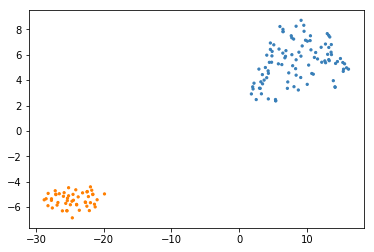

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
autocluster.predict(X)

In [15]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete'
   n_clusters___AgglomerativeClustering, Value: 10
 , ta_runs=0, ta_time_used=0, wallclock_time=0.00011396408081054688),
 TrajEntry(train_perf=-166.44696828477916, incumbent_id=1, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete'
   n_clusters___AgglomerativeClustering, Value: 10
 , ta_runs=1, ta_time_used=0.05589461326599121, wallclock_time=0.06523323059082031),
 TrajEntry(train_perf=-172.1230067130906, incumbent_id=2, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'ward

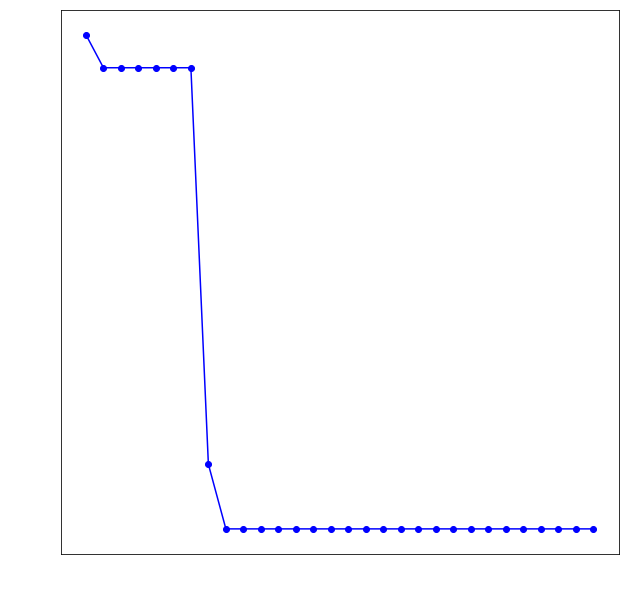

In [16]:
autocluster.plot_convergence()